In [23]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model

# Load the dataset directory path
data_dir = "M:/Datasets/aloi_ill/png"  # Update this to your dataset path
# data_dir = "M:\SIFT\small_data"  # Update this to your dataset path

image_paths = []
labels = []

# Load images and assign labels based on folder names
for label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, label)
    if os.path.isdir(class_dir):
        for file in os.listdir(class_dir):
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(class_dir, file))
                labels.append(int(label))  # Convert folder name to integer label



print(image_paths)
print(len(labels))

print(len(image_paths))






['M:/Datasets/aloi_ill/png\\1\\1_l1c1.png', 'M:/Datasets/aloi_ill/png\\1\\1_l1c2.png', 'M:/Datasets/aloi_ill/png\\1\\1_l1c3.png', 'M:/Datasets/aloi_ill/png\\1\\1_l2c1.png', 'M:/Datasets/aloi_ill/png\\1\\1_l2c2.png', 'M:/Datasets/aloi_ill/png\\1\\1_l2c3.png', 'M:/Datasets/aloi_ill/png\\1\\1_l3c1.png', 'M:/Datasets/aloi_ill/png\\1\\1_l3c2.png', 'M:/Datasets/aloi_ill/png\\1\\1_l3c3.png', 'M:/Datasets/aloi_ill/png\\1\\1_l4c1.png', 'M:/Datasets/aloi_ill/png\\1\\1_l4c2.png', 'M:/Datasets/aloi_ill/png\\1\\1_l4c3.png', 'M:/Datasets/aloi_ill/png\\1\\1_l5c1.png', 'M:/Datasets/aloi_ill/png\\1\\1_l5c2.png', 'M:/Datasets/aloi_ill/png\\1\\1_l5c3.png', 'M:/Datasets/aloi_ill/png\\1\\1_l6c1.png', 'M:/Datasets/aloi_ill/png\\1\\1_l6c2.png', 'M:/Datasets/aloi_ill/png\\1\\1_l6c3.png', 'M:/Datasets/aloi_ill/png\\1\\1_l7c1.png', 'M:/Datasets/aloi_ill/png\\1\\1_l7c2.png', 'M:/Datasets/aloi_ill/png\\1\\1_l7c3.png', 'M:/Datasets/aloi_ill/png\\1\\1_l8c1.png', 'M:/Datasets/aloi_ill/png\\1\\1_l8c2.png', 'M:/Datase

In [10]:
# Step 1: Load EfficientNet model
base_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)


In [11]:
# Step 2: Preprocess images and extract features
def extract_features(image_paths):
    features = []
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))  # Resize to EfficientNet input size
        img = preprocess_input(img)  # Preprocess the image
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        feature = model.predict(img)  # Extract features
        features.append(feature.flatten())  # Flatten the feature vector
    return np.array(features)

# Extract features for all images
combined_features = extract_features(image_paths)
labels = np.array(labels)

1/1 [==============================] - 0s 55ms/step


In [12]:
# Step 3: Train and test classifier
X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Using SVM for classification
from sklearn.svm import SVC

clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 99.90%


In [16]:
import random

# Select 20 random indices
random_indices = random.sample(range(len(y_test)), 20)

# Print y_test and y_pred side by side for the selected indices
comparison = np.column_stack((y_test[random_indices], y_pred[random_indices]))
print(comparison)

[[135 135]
 [193 193]
 [586 586]
 [109 109]
 [998 998]
 [822 822]
 [562 562]
 [473 473]
 [147 147]
 [215 215]
 [510 510]
 [550 550]
 [633 633]
 [ 84  84]
 [709 709]
 [ 90  90]
 [947 947]
 [989 989]
 [691 691]
 [  9   9]]


In [19]:
print(y_pred[1], y_test[1],labels[1])





8 8 1


Predicted: 214, Actual: 1


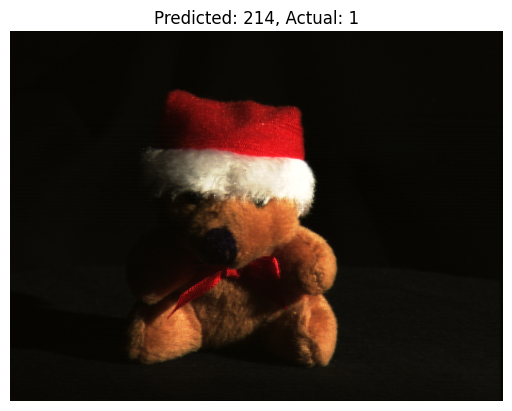

Predicted: 8, Actual: 1


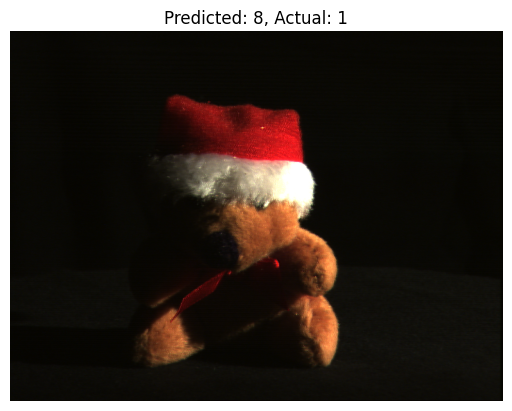

Predicted: 754, Actual: 1


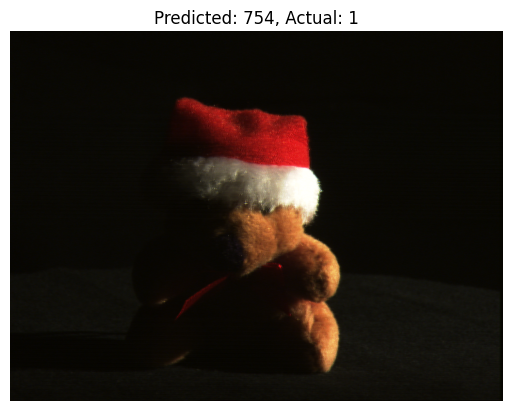

Predicted: 902, Actual: 1


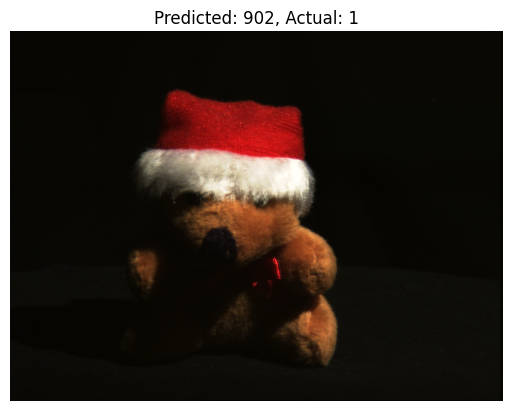

Predicted: 879, Actual: 1


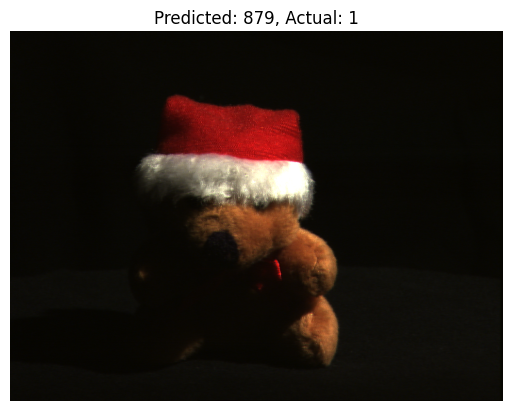

In [17]:
# Optional: Visualize some predictions
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {labels[i]}")
    plt.imshow(cv2.cvtColor(cv2.imread(image_paths[i]), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {y_pred[i]}, Actual: {labels[i]}")
    plt.axis("off")
    plt.show()